In [1]:
import sys
import networkx as nx
import os
# -------------Torch-------------------
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import numpy as np

import random
import pickle


sys.path.insert(0, "../lib/")

data_path = '../Datasets/'
%load_ext autoreload
%autoreload 2

# MNIST

In [2]:
# Downloads the dataset if not found locally
from mnist import check_mnist_dataset_exists, datasampler, MNISTDataset

_ = check_mnist_dataset_exists()

nb_selected_train_data = 640
nb_selected_test_data = 128

train_data, train_labels, test_data, test_labels = datasampler(
    nb_selected_train_data, nb_selected_test_data
)

trainset = MNISTDataset(train_data, train_labels, lattice_type=0)
testset = MNISTDataset(test_data, test_labels)

/Users/axel/miniconda3/envs/DGL/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


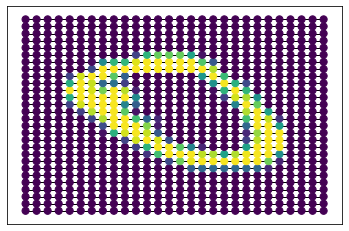

In [3]:
g, label, s = trainset[1]
G = g.to_networkx().to_undirected()
M, N = 28, 28

x = np.linspace(0,1,M)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,x)

positions = np.vstack([Y.ravel(), X.ravel()])

nx.draw_networkx_nodes(G, positions.T, node_color=s, node_size=50)
nx.draw_networkx_edges(G, positions.T)

# Sub-sampled MNIST DGL

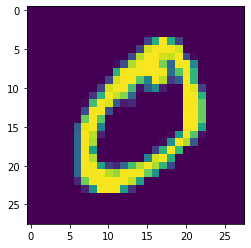

In [4]:
plt.imshow(s.view(28,-1))

In [5]:
g.ndata['h'] = s

In [6]:
from graphs import random_node_suppression
import copy

In [7]:
G, l = random_node_suppression(copy.copy(g), 30)

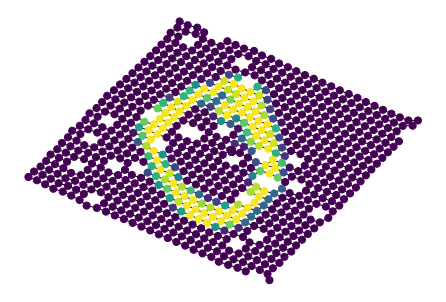

In [8]:
pos = nx.kamada_kawai_layout(G.to_networkx().to_undirected())
nx.draw(G.to_networkx().to_undirected(),pos=pos, node_color=G.ndata['h'], node_size=50)

In [9]:
G

DGLGraph(num_nodes=787, num_edges=2818,
         ndata_schemes={'h': Scheme(shape=(), dtype=torch.float32)}
         edata_schemes={})

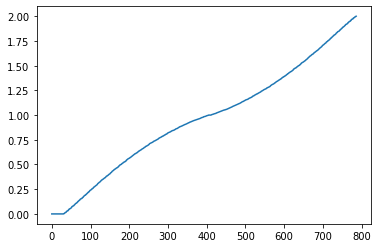

In [10]:
plt.plot(nx.normalized_laplacian_spectrum(G.to_networkx().to_undirected()))

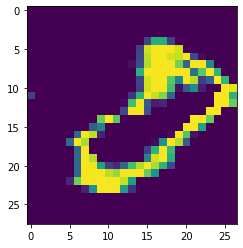

In [11]:
plt.imshow(G.ndata['h'][0:28*27].view(28,-1))

# Superpixel

In [12]:
from superpixels import SuperPixDataset, SuperPixDatasetDGL
DATASET_NAME = 'MNIST'
dataset = SuperPixDatasetDGL(DATASET_NAME) # 54s
trainset, valset, testset = dataset.train, dataset.val, dataset.test

Adj matrix defined from super-pixel locations (only)
preparing 10000 graphs for the TEST set...
preparing 60000 graphs for the TRAIN set...
[I] Data load time: 423.2953s


tensor(4)


/Users/axel/miniconda3/envs/DGL/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


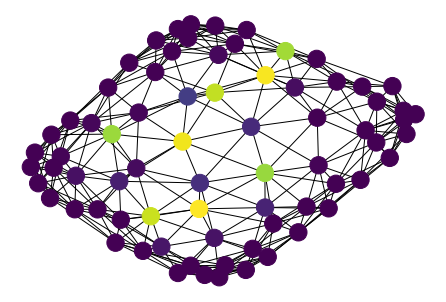

In [13]:
g, l = trainset[2]
nx.draw_spring(g.to_networkx().to_undirected(),
                     node_color=g.ndata['feat'][:,0])
print(l)

# Zinc

In [14]:
from molecules import MoleculeDatasetDGL 

dataset = MoleculeDatasetDGL('ZINC')
trainset, valset, testset = dataset.train, dataset.val, dataset.test

preparing 10000 graphs for the TRAIN set...
preparing 1000 graphs for the VAL set...
preparing 1000 graphs for the TEST set...
Time taken: 91.8608s


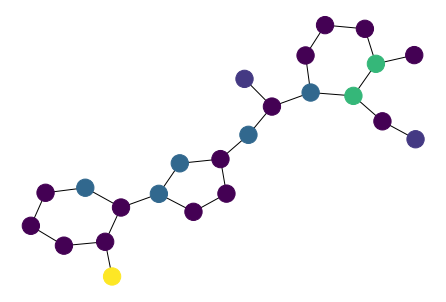

In [15]:
g,l = trainset[11]
nx.draw_kamada_kawai(g.to_networkx().to_undirected(), node_color= g.ndata['feat'])